<a href="https://colab.research.google.com/github/prashant-2901/JS-Filter-Boilerplate/blob/master/Main_PROJECT_SENTIMENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import 

import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

In [ ]:
# Loading dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_full1.csv')

In [ ]:
# Printing data 

data

,Unnamed: 0,polarity,text
0,0,0,@craziex3 no i do NOT have a hangover! haha &a...
1,1,0,@babydollniki Almost a thousand dollars.
2,2,0,"hard to concentrate, exams are so close"
3,3,0,Button missed corner #f1
4,4,4,@ElkaBr Good Morning How are you? How is you...
...,...,...,...
255208,255208,2,case dont look candidate then that case person...
255209,255209,2,congress veteran sudhakar reddy joins bjp afte...
255210,255210,2,save your agenda peddling ’ had with terror at...
255211,255211,2,did you cover her interaction forum where she ...


In [ ]:
#Checking if any null values present

(data.isnull().sum() / len(data))*100

Unnamed: 0    0.000000
polarity      0.000000
text          0.000784
dtype: float64

In [ ]:
# Dropping unwanted columns

data = data.drop('Unnamed: 0', axis = 1)

In [ ]:
# Dropping duplicate values

data = data.drop_duplicates('text')
print(data.shape)

(254359, 2)


In [ ]:
# Dropping Null Values

data.dropna()

,polarity,text
0,0,@craziex3 no i do NOT have a hangover! haha &a...
1,0,@babydollniki Almost a thousand dollars.
2,0,"hard to concentrate, exams are so close"
3,0,Button missed corner #f1
4,4,@ElkaBr Good Morning How are you? How is you...
...,...,...
255208,2,case dont look candidate then that case person...
255209,2,congress veteran sudhakar reddy joins bjp afte...
255210,2,save your agenda peddling ’ had with terror at...
255211,2,did you cover her interaction forum where she ...


In [ ]:
#Checking if any null values present

(data.isnull().sum() / len(data))*100

polarity    0.000000
text        0.000393
dtype: float64

In [ ]:
#converting pandas object to a string type

data['text'] = data['text'].astype('str')

In [ ]:
# Downloading and printing stopwards

nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'you', 'on', 'are', 'hers', 'as', 'herself', 'through', 'll', 'your', 'didn', 'mustn', 'i', 'few', 'most', 'am', "that'll", 'has', 'weren', 'o', 'into', 'other', 'was', 'until', 'off', "weren't", 'not', 'by', 'at', 'an', 'over', 'that', "won't", "doesn't", 'nor', 'to', "wouldn't", 'and', 'against', "aren't", 'up', "shan't", "shouldn't", 'some', 'it', 'have', 'myself', 'mightn', "didn't", 'before', 'is', "needn't", 'with', 'further', 'his', 'them', 'once', 'yours', 'be', 'how', "hadn't", 'why', 'hadn', 'because', 'd', 'having', 'any', 'all', "don't", 'can', 'wasn', 'no', 'its', 've', 'themselves', 'my', 'ourselves', 'ain', 'isn', "you'll", 'yourself', 'then', 'this', 'theirs', 'those', "you'd", 'so', "it's", 'wouldn', 'we', 'did', 'had', 'hasn', 'which', 'but', "hasn't", 'these', 'itself', 'while', 'our', 'whom', 'under', 're', 'same', 'now', 'when', 'him', 'more', 'a'

In [ ]:
nltk.download('punkt')                                # Used to divide text into list of sentences
nltk.download('wordnet')                              # Used for lemmitization of sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Method for data cleaning


urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [ ]:
# Passing tweets to above method for cleaning

data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [ ]:
# Checking data for preprocessed tweets

data

,polarity,text,processed_tweets
0,0,@craziex3 no i do NOT have a hangover! haha &a...,craziex3 hangover haha amp didnt co laaaate am...
1,0,@babydollniki Almost a thousand dollars.,babydollniki almost thousand dollar
2,0,"hard to concentrate, exams are so close",ard concentrate exam close
3,0,Button missed corner #f1,utton missed corner f1
4,4,@ElkaBr Good Morning How are you? How is you...,elkabr good morning little princess feeling
...,...,...,...
255208,2,case dont look candidate then that case person...,ase dont look candidate case person like manmo...
255209,2,congress veteran sudhakar reddy joins bjp afte...,ongress veteran sudhakar reddy join bjp meetin...
255210,2,save your agenda peddling ’ had with terror at...,ave agenda peddling terror attack every second...
255211,2,did you cover her interaction forum where she ...,id cover interaction forum left


In [ ]:
X = data['processed_tweets'].values
y = data['polarity'].values
X

array(['craziex3 hangover haha amp didnt co laaaate amp bed still',
       'babydollniki almost thousand dollar',
       'ard concentrate exam close', ...,
       'ave agenda peddling terror attack every second day maun mohan keeping stoic silence india made mockery whatever keep trying modi coming back thumping majority time darbaris numbered',
       'id cover interaction forum left',
       'big project came india modi dream project happened reality'],
      dtype=object)

In [ ]:
#Convert a collection of raw documents to a matrix of TF-IDF features.

vector = TfidfVectorizer(sublinear_tf=True)
vector.fit(X)                         # To fit X
X=vector.transform(X)                 # To transform X
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))



Vector fitted.
No. of feature_words:  202056


In [ ]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

In [ ]:
# Model
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

In [ ]:
#Evaluate the model and applying Bernoulli Naive Bayes
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75     19804
           2       0.99      0.96      0.97     11134
           4       0.75      0.74      0.74     19934

    accuracy                           0.80     50872
   macro avg       0.83      0.82      0.82     50872
weighted avg       0.80      0.80      0.80     50872



In [ ]:
# Loading our test data

covid_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid_Data.csv')

In [ ]:
covid_Data

,Unnamed: 0,text,location
0,1,@BSYBJP @PMOIndia @narendramodi @mla_sudhakar ...,"City of London, London"
1,2,@KhatamEvm @chetan_bhagat Trgts..covishield 10...,"कोलकाता, भारत"
2,4,The first jab of the Sputnik V vaccine has bee...,Sri Lanka
3,5,@Tejasvi_Surya @JPNadda India gets 18 million ...,Bangalore
4,6,@washingtonpost The United States put pressure...,"Málaga, España"
...,...,...,...
13750,16229,@bustin456 @theMrMobile India does have its ow...,India
13751,16230,Congratulations India for Getting Oxford Vacci...,"San Diego, CA, USA"
13752,16232,@lancelot_pinto This happened to me on April 4...,"Bengaluru, India"
13753,16233,"Central govt allocated 44,500 vials of Remdesi...",New Delhi


In [ ]:
#Checking if any null values present
(covid_Data.isnull().sum() / len(data))*100

Unnamed: 0    0.0
text          0.0
location      0.0
dtype: float64

In [ ]:
# Dropping inwanted columns 

covid_Data = covid_Data.drop('Unnamed: 0', axis =1)
print(covid_Data.shape)

(13755, 2)


In [ ]:
#converting pandas object to a string type

covid_Data['text'] = covid_Data['text'].astype('str')

In [ ]:
# Passing tweets to above method for cleaning

covid_Data['processed_tweets'] = covid_Data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [ ]:
covid_Data

,text,location,processed_tweets
0,@BSYBJP @PMOIndia @narendramodi @mla_sudhakar ...,"City of London, London",bsybjp vaccine 18 mysore karnataka please arra...
1,@KhatamEvm @chetan_bhagat Trgts..covishield 10...,"कोलकाता, भारत",khatamevm trgtscovishield 1012crcovaxin 8crzyd...
2,The first jab of the Sputnik V vaccine has bee...,Sri Lanka,first jab sputnik vaccine given 4380 people fa...
3,@Tejasvi_Surya @JPNadda India gets 18 million ...,Bangalore,tejasvisurya india get 18 million readymade do...
4,@washingtonpost The United States put pressure...,"Málaga, España",washingtonpost united state put pressure brazi...
...,...,...,...
13750,@bustin456 @theMrMobile India does have its ow...,India,bustin456 india vaccine called covaxin covishi...
13751,Congratulations India for Getting Oxford Vacci...,"San Diego, CA, USA",ongratulations india getting oxford vaccine in...
13752,@lancelot_pinto This happened to me on April 4...,"Bengaluru, India",lancelotpinto happened april 4th mild symptom ...
13753,"Central govt allocated 44,500 vials of Remdesi...",New Delhi,entral govt allocated 44500 vial remdesivir bi...


In [ ]:
# Saving it in a new variable for predicting

X_test_new1 = covid_Data.processed_tweets.values
X_test_new1

array(['bsybjp vaccine 18 mysore karnataka please arrange for…',
       'khatamevm trgtscovishield 1012crcovaxin 8crzydus 7cr sputnik 7cr total 32 cr per montht…',
       'first jab sputnik vaccine given 4380 people far health ministry said read th…',
       ...,
       'lancelotpinto happened april 4th mild symptom april 2nd ignored took fi…',
       'entral govt allocated 44500 vial remdesivir bihar health minister covid19…',
       'owerful indian making aggressive call vaccine poonawalla covid19 covishield'],
      dtype=object)

In [ ]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
X_test_new1 = vector.transform(X_test_new1)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))
X_test_new1

Vector fitted.
No. of feature_words:  202056


<13755x202056 sparse matrix of type '<class 'numpy.float64'>'
	with 96776 stored elements in Compressed Sparse Row format>

In [ ]:
# Checking prediction of model for 1 value

nb.predict(X_test_new1[1])

array([2])

In [ ]:
# Prediciting for the covid dataset and saving into a new variable

df_predicted = nb.predict(X_test_new1)

In [ ]:
# Converting to DataFrame as df cannot contain nd-array

y_hats  = pd.DataFrame(df_predicted)

In [ ]:
# Adding the prediction to a new dataframe

df_final = covid_Data.reset_index()
df_final["Prediction"] = y_hats.reset_index()[0]


In [ ]:
df_final

,index,text,location,processed_tweets,Prediction
0,0,@BSYBJP @PMOIndia @narendramodi @mla_sudhakar ...,"City of London, London",bsybjp vaccine 18 mysore karnataka please arra...,2
1,1,@KhatamEvm @chetan_bhagat Trgts..covishield 10...,"कोलकाता, भारत",khatamevm trgtscovishield 1012crcovaxin 8crzyd...,2
2,2,The first jab of the Sputnik V vaccine has bee...,Sri Lanka,first jab sputnik vaccine given 4380 people fa...,2
3,3,@Tejasvi_Surya @JPNadda India gets 18 million ...,Bangalore,tejasvisurya india get 18 million readymade do...,4
4,4,@washingtonpost The United States put pressure...,"Málaga, España",washingtonpost united state put pressure brazi...,0
...,...,...,...,...,...
13750,13750,@bustin456 @theMrMobile India does have its ow...,India,bustin456 india vaccine called covaxin covishi...,2
13751,13751,Congratulations India for Getting Oxford Vacci...,"San Diego, CA, USA",ongratulations india getting oxford vaccine in...,2
13752,13752,@lancelot_pinto This happened to me on April 4...,"Bengaluru, India",lancelotpinto happened april 4th mild symptom ...,0
13753,13753,"Central govt allocated 44,500 vials of Remdesi...",New Delhi,entral govt allocated 44500 vial remdesivir bi...,2


In [ ]:
# Check count of each polarity

df_final.Prediction.value_counts()

0    6692
4    4040
2    3023
Name: Prediction, dtype: int64

In [ ]:
# Check count of tweets w.r.t location

print(df_final['location'].value_counts())

India                      1343
Mumbai, India               779
New Delhi, India            597
Mumbai                      476
Pune                        299
                           ... 
Frederick, MD                 1
19th Century Russia           1
Rishikesh, Uttaranchal        1
trivandrum, south india       1
India,Mumbai,Goregaon..       1
Name: location, Length: 3603, dtype: int64


In [ ]:
# Count of tweets in Pune
df_pune = df_final.loc[df_final['location'] == "Pune"]
  
df_pune

,index,text,location,processed_tweets,Prediction
1111,1111,A new Sputnik Light Vaccine! It’s a revolution...,Pune,new sputnik light vaccine revolutionary 1shot ...,0
2614,2614,@TimLitt35463134 @adarpoonawalla @SerumInstInd...,Pune,timlitt35463134 difference make use option like…,0
3833,3833,@IAS_Rubal much appreciate all that you are do...,Pune,iasrubal much appreciate mother wheelchair bou...,4
4437,4437,@rajeshtope11 @pcmcindiagovin @PCMCSarathi @ra...,Pune,rajeshtope11 let start drivein vaccination fac...,0
4920,4920,@AkhileshTekade @Jay_Patil_ @SanjayJog7 @rajes...,Pune,akhileshtekade covishield lot time cidrap…,4
...,...,...,...,...,...
12777,12777,Vaccinated.💉✔️.\n\n#vaccinated #Covishield htt...,Pune,accinated💉✔️ vaccinated covishield,4
12979,12979,Finally took my first shot of #Covishield at P...,Pune,inally took first shot covishield pune cantonm...,0
13002,13002,"Dear Omkar Anil Inamdar, You have successfully...",Pune,ear omkar anil inamdar successfully vaccinated...,2
13020,13020,@pertinacious_me It's Covishield in Pune. But ...,Pune,pertinaciousme covishield pune manage buddy th...,4


In [ ]:
# Check count of tweets in Mumbai

df_mumbai = df_final.loc[df_final['location'] == "Mumbai"]
  
df_mumbai

,index,text,location,processed_tweets,Prediction
8,8,@rahulpuri Haha! I thought by the time I'd get...,Mumbai,rahulpuri haha thought time id get vaccinated ...,0
528,528,What is an #adenovirus based vaccine? What hap...,Mumbai,hat adenovirus based vaccine happens live aden...,0
617,617,“Indian population is at risk and regulators s...,Mumbai,indian population risk regulator carefully exa...,2
779,779,@Apothecurry @PriyankaPulla It helps if both d...,Mumbai,apothecurry help dos component administration ...,2
962,962,@nikhilkarani1 So how long before we end up ap...,Mumbai,nikhilkarani1 long end approving india tick bo...,4
...,...,...,...,...,...
13618,13618,Raw Materials Are Not Needed For Manufacturing...,Mumbai,aw material needed manufacturing covishield st...,4
13627,13627,"@kunksed Both are great.\n\nOur age, Covishiel...",Mumbai,kunksed great age covishield balanced risk rew...,4
13692,13692,Vaccination for ages 18-44 to continue at the ...,Mumbai,accination age 1844 continue centre tomorrow 9...,0
13705,13705,"@OpIndia_com On top of this, even after being ...",Mumbai,opindiacom top even provided ylevel security a...,0


In [ ]:
# Check count of tweets in New Delhi

df_delhi = df_final.loc[df_final['location'] == "New Delhi"]
  
df_delhi

,index,text,location,processed_tweets,Prediction
23,23,Two vaccines are currently part of the drive s...,New Delhi,wo vaccine currently part drive since jan 2021...,0
159,159,36 cr Indians to get Sputnik V jabs by Mar 202...,New Delhi,cr indian get sputnik jab mar 2022 precisely 1...,2
414,414,@ANI @drharshvardhan Efficiency of available v...,New Delhi,ani efficiency available vaccine india covishi...,0
682,682,@ArvindKejriwal \nCM Delhi ..let us inform if ...,New Delhi,arvindkejriwal cm delhi let u inform sputnik a...,2
707,707,"@narendramodi @KirenRijiju Congratulations,......",New Delhi,narendramodi congratulation one query sputnik ...,2
...,...,...,...,...,...
13474,13474,@kamaalrkhan Had an excellent meeting with all...,New Delhi,kamaalrkhan excellent meeting partner amp stak...,4
13498,13498,@Profdilipmandal @adarpoonawalla @AstraZeneca ...,New Delhi,profdilipmandal dont think running…,0
13554,13554,Vaccine misinformation: Madras high court orde...,New Delhi,accine misinformation madras high court order ...,2
13659,13659,@SchollFused Boss. Right now india needs covis...,New Delhi,schollfused bos right india need covishield ev...,4


In [ ]:
# Check count of tweets in Bangalore

df_bangalore = df_final.loc[df_final['location'] == "Bangalore"]
  
df_bangalore

,index,text,location,processed_tweets,Prediction
3,3,@Tejasvi_Surya @JPNadda India gets 18 million ...,Bangalore,tejasvisurya india get 18 million readymade do...,4
5,5,@Tejasvi_Surya India gets 18 million ready-mad...,Bangalore,tejasvisurya india get 18 million readymade do...,4
66,66,"@kkmohan73 Covisheild, Covaxin, Sputnik V etc,...",Bangalore,kkmohan73 covisheild covaxin sputnik etc help ...,2
244,244,Best recommendation to take second dose of cov...,Bangalore,est recommendation take second dose covidsheil...,4
651,651,@allaboutbelgaum Sputnik V light one shot near...,Bangalore,allaboutbelgaum sputnik light one shot nearly ...,0
...,...,...,...,...,...
13000,13000,@swethaiyer @Bonjugal I guess that is the advi...,Bangalore,swethaiyer guess advisory covishield covaxin,0
13129,13129,@nithinkd Covishield or Covaxin?,Bangalore,nithinkd covishield covaxin,4
13150,13150,@CMofKarnataka @SetuAarogya @MoHFW_INDIA when ...,Bangalore,cmofkarnataka vaccination drive start 18 karna...,0
13452,13452,Raw Materials Are Not Needed For Manufacturing...,Bangalore,aw material needed manufacturing covishield co...,2


In [ ]:
# Finding the total count of tweets location wise

r_bangalore, c_bangalore = df_bangalore.shape
r_delhi, c_delhi = df_delhi.shape
r_mumbai, c_mumbai = df_mumbai.shape
r_pune, c_pune = df_pune.shape

In [ ]:
# Finding Positive, Neutral and Negative count of tweets location wise

pos_bangalore = (((df_bangalore.Prediction == 0).sum()/r_bangalore)*100).round(decimals = 2)
neu_bangalore = (((df_bangalore.Prediction == 2).sum()/r_bangalore)*100).round(decimals = 2)
neg_bangalore = (((df_bangalore.Prediction == 4).sum()/r_bangalore)*100).round(decimals = 2)
print("Bangalore   - Positive = ", pos_bangalore,"       Negative = ",neg_bangalore,"       Neutral = ",neu_bangalore)


pos_mumbai = (((df_mumbai.Prediction == 0).sum()/r_mumbai)*100).round(decimals = 2)
neu_mumbai = (((df_mumbai.Prediction == 2).sum()/r_mumbai)*100).round(decimals = 2)
neg_mumbai = (((df_mumbai.Prediction == 4).sum()/r_mumbai)*100).round(decimals = 2)
print("Mumbai      - Positive = ", pos_mumbai,"       Negative = ",neg_mumbai,"      Neutral = ",neu_mumbai)


pos_pune = (((df_pune.Prediction == 0).sum()/r_pune)*100).round(decimals = 2)
neu_pune = (((df_pune.Prediction == 2).sum()/r_pune)*100).round(decimals = 2)
neg_pune = (((df_pune.Prediction == 4).sum()/r_pune)*100).round(decimals = 2)
print("Pune        - Positive = ", pos_pune,"      Negative = ",neg_bangalore,"       Neutral = ",neu_bangalore)


pos_delhi = (((df_delhi.Prediction == 0).sum()/r_delhi)*100).round(decimals = 2)
neu_delhi = (((df_delhi.Prediction == 2).sum()/r_delhi)*100).round(decimals = 2)
neg_delhi = (((df_delhi.Prediction == 4).sum()/r_delhi)*100).round(decimals = 2)
print("Delhi       - Positive = ", pos_delhi,"      Negative = ",neg_delhi,"      Neutral = ",neu_delhi)

Bangalore   - Positive =  53.6        Negative =  27.2        Neutral =  19.2
Mumbai      - Positive =  52.1        Negative =  34.45       Neutral =  13.45
Pune        - Positive =  90.64       Negative =  27.2        Neutral =  19.2
Delhi       - Positive =  46.63       Negative =  25.91       Neutral =  27.46


([<matplotlib.axis.XTick at 0x7f5de8e33610>,
 [Text(0, 0, 'Bangalore'),
  Text(0, 0, 'Mumbai'),
  Text(0, 0, 'Pune'),
  Text(0, 0, 'Delhi')])

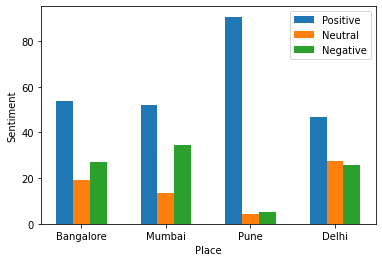

In [ ]:
# Plotting a bar graph


w=0.2
place_Name = ["Bangalore","Mumbai","Pune","Delhi"]

overall_Pos = [pos_bangalore,pos_mumbai,pos_pune,pos_delhi]
overall_Neu = [neu_bangalore,neu_mumbai,neu_pune,neu_delhi]
overall_Neg = [neg_bangalore,neg_mumbai,neg_pune,neg_delhi]

bar1 = np.arange(len(overall_Pos))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.bar(bar1,overall_Pos,w,label = "Positive")
plt.bar(bar2,overall_Neu,w,label = "Neutral")
plt.bar(bar3,overall_Neg,w,label = "Negative")

plt.xlabel("Place")
plt.ylabel("Sentiment")
plt.legend()
plt.xticks(bar1+w,place_Name)